<a href="https://colab.research.google.com/github/jihyun0821/DAOU-FITs-3-PARKJIHYUN/blob/%EC%8B%A4%EC%8A%B5/%5BCS%5D%20250109-%EC%8B%A4%EC%8A%B5%2025%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로딩

In [ ]:
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics

data = pd.read_csv('customer_churn_data.csv')

# 데이터 확인
print(data.head())

# 결측값 확인
print(data.isna().sum())

   customer_id  age  tenure       balance  num_products  has_credit_card  \
0            1   56       3   6151.741470             1                1   
1            2   69       3  11917.386876             1                0   
2            3   46       9   9859.133095             1                0   
3            4   32       7  13735.355961             1                1   
4            5   60       5  18671.892903             1                1   

   is_active_member  estimated_salary  churn  
0                 0      51227.634099      0  
1                 1     148480.339030      0  
2                 0      83292.426829      0  
3                 1      93824.611981      0  
4                 0     134834.223448      0  
customer_id         0
age                 0
tenure              0
balance             0
num_products        0
has_credit_card     0
is_active_member    0
estimated_salary    0
churn               0
dtype: int64


# 전처리

In [ ]:
# 특징 및 라벨 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 범주형 변수 처리 - One-Hot Encoding
# categorical_cols = ['num_products', 'has_credit_card', 'is_active_member']
# X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
# 계량형 - StandardScaler, 분류형 - MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a110ac1f550>,
 'caps': [<matplotlib.lines.Line2D at 0x7a110bc7ff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a110ac1f280>,
 'medians': [<matplotlib.lines.Line2D at 0x7a110bc7e590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a110bc7eef0>,
 'means': []}

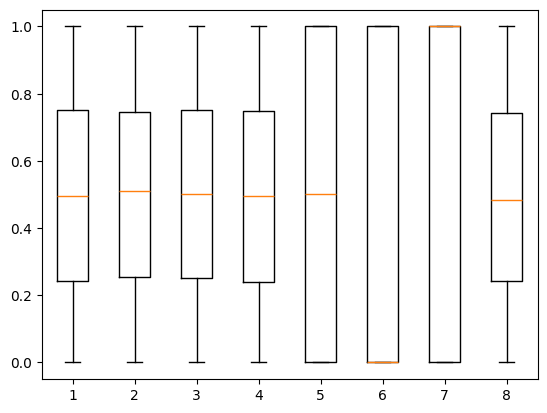

In [ ]:
plt.boxplot(X_train)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       158
           1       0.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.62      0.79      0.70       200

Confusion Matrix:
 [[158   0]
 [ 42   0]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# predict
rf_pred = rf_model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       158
           1       0.50      0.02      0.05        42

    accuracy                           0.79       200
   macro avg       0.65      0.51      0.46       200
weighted avg       0.73      0.79      0.71       200

Confusion Matrix:
 [[157   1]
 [ 41   1]]


# Performance

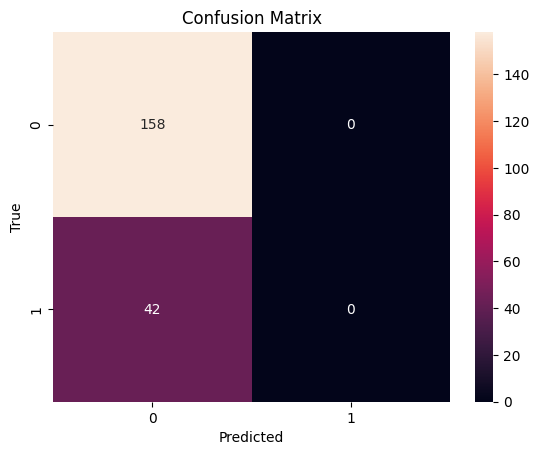

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       158
           1       0.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.62      0.79      0.70       200



In [ ]:
# visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Recall, F1-score
print(classification_report(y_test, y_pred))


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Model Tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best Model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate Tuned Model
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Accuracy: 0.79


In [ ]:
import joblib

# save model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# predict model
loaded_model = joblib.load('best_rf_model.pkl')
new_pred = loaded_model.predict(X_test)
print(f'Predicted Churn: {new_pred[0]}')
print("Accuracy:", accuracy_score(y_test, new_pred))



Predicted Churn: 0
Accuracy: 0.79
